In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('Training Images:{}'.format(x_train.shape))

print('Testing Images:{}'.format(x_test.shape))

Training Images:(60000, 28, 28)
Testing Images:(10000, 28, 28)


In [4]:
print(x_train[0].shape)

(28, 28)


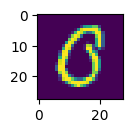

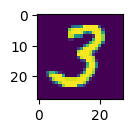

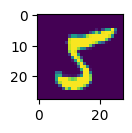

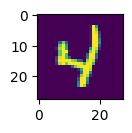

In [5]:
for i in range(234,238):
  plt.subplot(120+1+i)
  img=x_train[i]
  plt.imshow(img)
  plt.show()

In [6]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 42s 85ms/step - loss: 0.2168 - accuracy: 0.9375 - val_loss: 0.0791 - val_accuracy: 0.9763
Epoch 2/5
469/469 [==============================] - 34s 71ms/step - loss: 0.0667 - accuracy: 0.9801 - val_loss: 0.0549 - val_accuracy: 0.9829
Epoch 3/5
469/469 [==============================] - 38s 81ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0475 - val_accuracy: 0.9838
Epoch 4/5
469/469 [==============================] - 36s 76ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 36s 77ms/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0416 - val_accuracy: 0.9862


In [8]:
# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 11ms/step


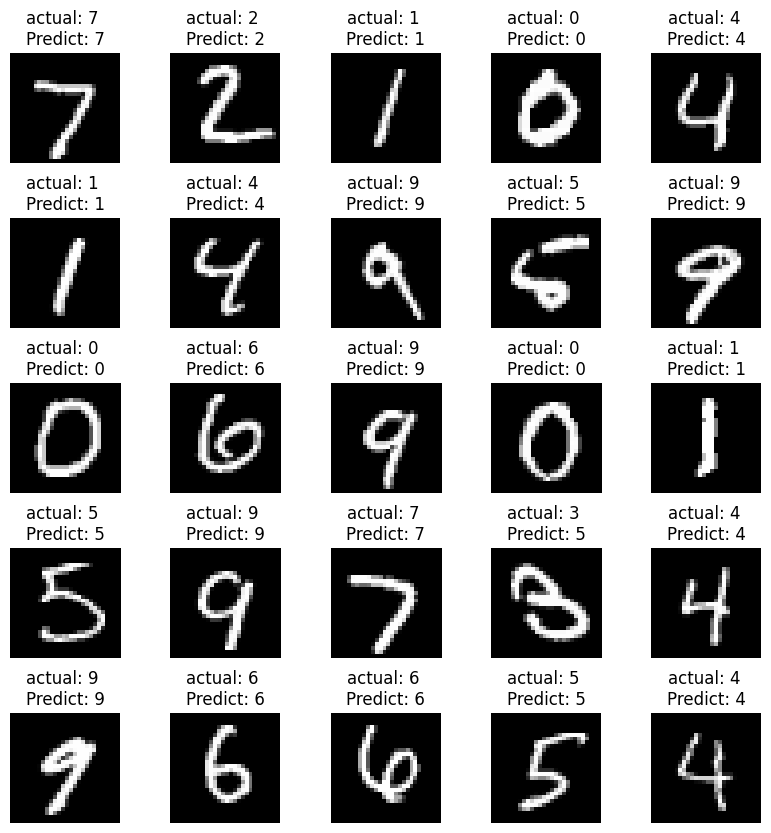

In [9]:
#Print the predicted images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title('actual: %s \nPredict: %s' % (np.argmax(y_test[i]), predicted_labels[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()